In [1]:
#### This Program uses Artificial recurrent neural network called Long short Term Memory(LsTM)
# To Predict the closing price of Microsft stock(MSFT) Using the Past 60 days of stock Price.

import math
from keras.models import Sequential
import numpy as np
#import pandas_datereader as web
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

Using TensorFlow backend.
C:\Users\19737\anaconda3\envs\pythonCPU\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\19737\anaconda3\envs\pythonCPU\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\19737\anaconda3\envs\pythonCPU\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\19737\anaconda3\envs\pytho

In [2]:
df = pd.read_csv("MSFT.csv", parse_dates=["Date"], index_col="Date")
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,30.620001,31.100000,30.590000,30.950001,24.226894,38409100
2010-01-05,30.850000,31.100000,30.639999,30.959999,24.234720,49749600
2010-01-06,30.879999,31.080000,30.520000,30.770000,24.085989,58182400
2010-01-07,30.629999,30.700001,30.190001,30.450001,23.835503,50559700
2010-01-08,30.280001,30.879999,30.240000,30.660000,23.999893,51197400
...,...,...,...,...,...,...
2020-07-20,205.000000,212.300003,203.009995,211.600006,211.600006,36884800
2020-07-21,213.660004,213.940002,208.029999,208.750000,208.750000,38105800
2020-07-22,209.199997,212.300003,208.389999,211.750000,211.750000,49605700


In [3]:
df.shape

(2658, 6)

In [53]:
## Creat a new dataFrame with the 'Close column'
data = df.filter(['Close'])
dataset = data.values
## Get the number of rows to train the model on
training_data_len = math.ceil(len(dataset) * .8)
training_data_len

2127

In [54]:
## Scaled the data

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)
scaled_data

array([[0.04150332],
       [0.04155558],
       [0.04056244],
       ...,
       [0.98656627],
       [0.93842448],
       [0.9319429 ]])

In [24]:
## Creat the Training Data Set
## Creat the scaled training data set

train_data = scaled_data[0:training_data_len, :]
## Split the data into x_train and y_train dataset

x_train=[]

y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i -60:i, 0])
    y_train.append(train_data[i, 0])
    
    if i<=61:
        print(x_train)
        print(y_train)
        print()


[array([0.04150332, 0.04155558, 0.04056244, 0.03888976, 0.03998745,
       0.03794888, 0.03690345, 0.03836705, 0.04155558, 0.04103288,
       0.04228739, 0.03962156, 0.03658983, 0.03110135, 0.03298312,
       0.033924  , 0.03481261, 0.03214678, 0.0270242 , 0.02822644,
       0.02848779, 0.0293764 , 0.02524698, 0.02618786, 0.02461972,
       0.02613559, 0.02603105, 0.02671058, 0.02571742, 0.02791281,
       0.02916732, 0.03115362, 0.0301082 , 0.02989912, 0.02780827,
       0.0293764 , 0.02921959, 0.02958549, 0.03141498, 0.02848779,
       0.02848779, 0.0293764 , 0.02916732, 0.0293764 , 0.03026501,
       0.03115362, 0.03225132, 0.03272176, 0.03282631, 0.03324448,
       0.03460352, 0.03449898, 0.03439444, 0.03444671, 0.0359103 ,
       0.03470806, 0.03658983, 0.03476034, 0.03439444, 0.03533532])]
[0.03282630688524307]

[array([0.04150332, 0.04155558, 0.04056244, 0.03888976, 0.03998745,
       0.03794888, 0.03690345, 0.03836705, 0.04155558, 0.04103288,
       0.04228739, 0.03962156, 0.03

In [55]:
## convert the x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

In [56]:
## Rehsape the data because LSTM requires 3D data
# x_train = np.reshape(x_train, [2658, 60, 1])

x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(2598, 60, 1)

In [57]:
## Build the LSTM mode
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape = (x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences = False))
model.add(Dense(25))
model.add(Dense(1))

In [58]:
## compile the model

model.compile(optimizer='adam', loss='mean_squared_error')


In [68]:
## Train the model

model.fit(x_train, y_train, batch_size =1, epochs=5)

Epoch 1/5
2598/2598 [==============================] - 135s 52ms/step - loss: 5.0169e-040s - loss:
Epoch 2/5
2598/2598 [==============================] - 143s 55ms/step - loss: 4.3706e-04
Epoch 3/5
2598/2598 [==============================] - 148s 57ms/step - loss: 2.5354e-04
Epoch 4/5
2598/2598 [==============================] - 154s 59ms/step - loss: 3.0219e-04
Epoch 5/5
2598/2598 [==============================] - 170s 66ms/step - loss: 2.0466e-04


In [69]:
## Create the testing data set
## Creat a new array containing scaled values from index value 2598 to 2658 (remember 2658 is the end of our dataset[,:])
test_data = scaled_data[training_data_len - 60:, :]
# creat the dataset x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]

for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
    



In [70]:
## convert my data to numpy
x_test = np.array(x_test)
x_test.shape

(531, 60)

In [71]:
## Reshape the Data

x_test = np.reshape(x_test,(x_test.shape[0], x_test.shape[1], 1))

In [72]:
## Get the model predicted price values for the x_test data set

predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

In [73]:
## i want to evaluate this model by getting the mean squared error

rmse = np.sqrt(np.mean(predictions - y_test)**2)
rmse

4.974202751204611

C:\Users\19737\anaconda3\envs\pythonCPU\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
C:\Users\19737\anaconda3\envs\pythonCPU\lib\site-packages\ipykernel_launcher.py:15: MatplotlibDeprecationWarning: Unrecognized location 'Upper Right'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  from ipykernel import kernelapp as app


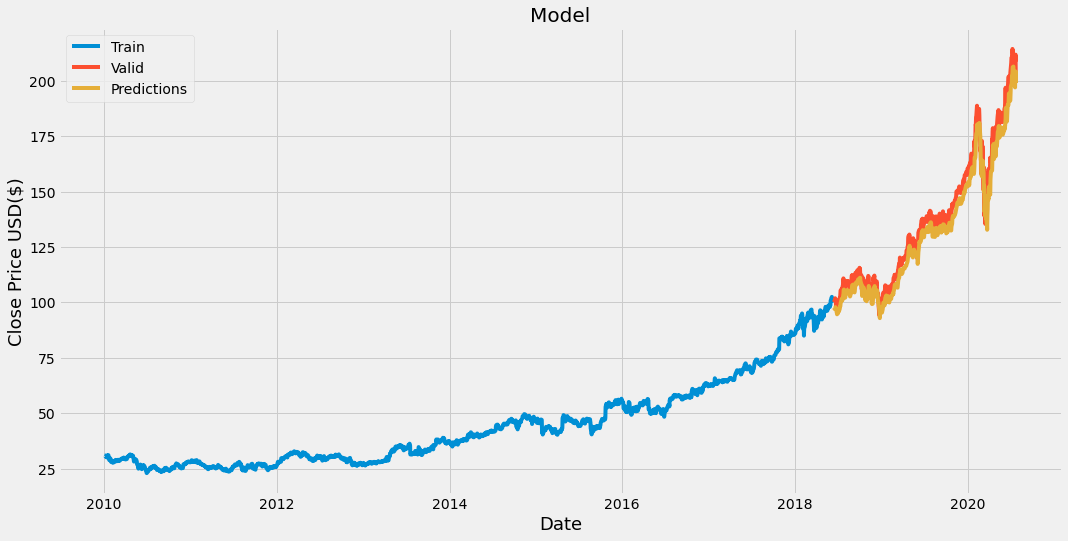

In [80]:
## plot the data

train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions

###  Visualize the data

plt.figure(figsize=(16, 8))
plt.title('Model', fontsize = 20)
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train','Valid', 'Predictions'], loc = 'Upper Right')

In [81]:
## show the valid predicted prices
valid

,Close,Predictions
Date,,
2018-06-15,100.129997,97.597359
2018-06-18,100.860001,97.009354
2018-06-19,100.860001,97.085869
2018-06-20,101.870003,97.207962
2018-06-21,101.139999,97.841377
...,...,...
2020-07-20,211.600006,196.978195
2020-07-21,208.750000,201.872330
2020-07-22,211.750000,202.583115


In [89]:
## Get the Quote

df = pd.read_csv("MSFT.csv", parse_dates=["Date"], index_col="Date")

## Creat new frame

df1 = df.filter(['Close'])
## get the last 60 days closing price value and convert the dataFrame
last_60_days = df1[-60:].values

## scale the data to be values between 0 and 1
last_60_days_scaled = scaler.transform(last_60_days)

## creat an empty lis

x_test = []
## Append the past 60 days
x_test.append(last_60_days_scaled)
# convert the x_test data to set of numpy array
x_test = np.array(x_test)
## Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))
# Get the predictions prices
pred_price = model.predict(x_test)
## Undo the scaling
pred_price = scaler.inverse_transform(pred_price)
print(pred_price)


[[195.65677]]


In [103]:
df2 = pd.read_csv("MSFT.csv", parse_dates=["Date"], index_col="Date")
df2

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,30.620001,31.100000,30.590000,30.950001,24.226894,38409100
2010-01-05,30.850000,31.100000,30.639999,30.959999,24.234720,49749600
2010-01-06,30.879999,31.080000,30.520000,30.770000,24.085989,58182400
2010-01-07,30.629999,30.700001,30.190001,30.450001,23.835503,50559700
2010-01-08,30.280001,30.879999,30.240000,30.660000,23.999893,51197400
...,...,...,...,...,...,...
2020-07-20,205.000000,212.300003,203.009995,211.600006,211.600006,36884800
2020-07-21,213.660004,213.940002,208.029999,208.750000,208.750000,38105800
2020-07-22,209.199997,212.300003,208.389999,211.750000,211.750000,49605700


In [108]:

g = df2["2017-07-25":"2017-07-25"]
g

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-07-25,73.800003,74.309998,73.5,74.190002,70.73613,22018700


In [100]:
rng = pd.date_range(start="7/28/2020", end ="7/28/2020")
rng

DatetimeIndex(['2020-07-28'], dtype='datetime64[ns]', freq='D')